<a href="https://colab.research.google.com/github/rohamvo/LOL-data-analysis/blob/main/Champion_Recommendation_and_Win_Lose_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from tqdm import tqdm
import time
from datetime import datetime
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.font_manager

In [ ]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

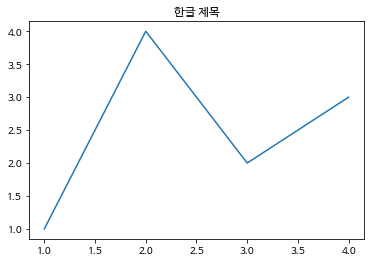

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# test to verify the Korean font is installed and working
plt.figure()
plt.title('한글 제목')
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.show()

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 그래프 크기 고정
plt.rcParams["figure.figsize"] = (12, 9)

# 음수 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set Nanum as the default font
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

In [ ]:
diamond_match_champ_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_champ_last_df.csv')
diamond_match_level_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_level_last_df.csv')
diamond_match_kills_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_kills_last_df.csv')
diamond_match_deaths_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_deaths_last_df.csv')
diamond_match_assists_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_assists_last_df.csv')
diamond_match_golds_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_golds_last_df.csv')
diamond_match_damage_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_damage_last_df.csv')
diamond_match_winlose_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_winlose_last_df.csv')
diamond_match_stat_perks_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_stat_perks_last_df.csv')
diamond_match_perks_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_perks_last_df.csv')
diamond_match_tp_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_tp_last_df.csv')
diamond_match_spell_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_spell_last_df.csv')
diamond_match_kda_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/diamond_match_kda_df.csv')

In [ ]:
diamond_match_champ_df = diamond_match_champ_df.drop('Unnamed: 0', axis=1)
diamond_match_level_df = diamond_match_level_df.drop('Unnamed: 0', axis=1)
diamond_match_kills_df = diamond_match_kills_df.drop('Unnamed: 0', axis=1)
diamond_match_deaths_df = diamond_match_deaths_df.drop('Unnamed: 0', axis=1)
diamond_match_assists_df = diamond_match_assists_df.drop('Unnamed: 0', axis=1)
diamond_match_golds_df = diamond_match_golds_df.drop('Unnamed: 0', axis=1)
diamond_match_damage_df = diamond_match_damage_df.drop('Unnamed: 0', axis=1)
diamond_match_winlose_df = diamond_match_winlose_df.drop('Unnamed: 0', axis=1)
diamond_match_stat_perks_df = diamond_match_stat_perks_df.drop('Unnamed: 0', axis=1)
diamond_match_perks_df = diamond_match_perks_df.drop('Unnamed: 0', axis=1)
diamond_match_tp_df = diamond_match_tp_df.drop('Unnamed: 0', axis=1)
diamond_match_spell_df = diamond_match_spell_df.drop('Unnamed: 0', axis=1)
diamond_match_kda_df = diamond_match_kda_df.drop('Unnamed: 0', axis=1)

In [ ]:
diamond_match_champ_df.rename(columns = {'0':'champ_1','1':'champ_2'},inplace=True)
diamond_match_level_df.rename(columns = {'0':'level_1','1':'level_2'},inplace=True)
diamond_match_golds_df.rename(columns = {'0':'golds_1','1':'golds_2'},inplace=True)
diamond_match_damage_df.rename(columns = {'0':'damage_1','1':'damage_2'},inplace=True)
diamond_match_winlose_df.rename(columns = {'0':'winlose_1','1':'winlose_2'},inplace=True)
diamond_match_kda_df.rename(columns = {'0':'kda_1','1':'kda_2'},inplace=True)

In [ ]:
master_match_champ_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_champ_last_df.csv')
master_match_level_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_level_last_df.csv')
master_match_kills_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_kills_last_df.csv')
master_match_deaths_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_deaths_last_df.csv')
master_match_assists_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_assists_last_df.csv')
master_match_golds_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_golds_last_df.csv')
master_match_damage_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_damage_last_df.csv')
master_match_winlose_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_winlose_last_df.csv')
master_match_stat_perks_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_stat_perks_last_df.csv')
master_match_perks_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_perks_last_df.csv')
master_match_tp_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_tp_last_df.csv')
master_match_spell_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_spell_last_df.csv')
master_match_kda_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/master_match_kda_df.csv')

In [ ]:
master_match_champ_df = master_match_champ_df.drop('Unnamed: 0', axis=1)
master_match_level_df = master_match_level_df.drop('Unnamed: 0', axis=1)
master_match_kills_df = master_match_kills_df.drop('Unnamed: 0', axis=1)
master_match_deaths_df = master_match_deaths_df.drop('Unnamed: 0', axis=1)
master_match_assists_df = master_match_assists_df.drop('Unnamed: 0', axis=1)
master_match_golds_df = master_match_golds_df.drop('Unnamed: 0', axis=1)
master_match_damage_df = master_match_damage_df.drop('Unnamed: 0', axis=1)
master_match_winlose_df = master_match_winlose_df.drop('Unnamed: 0', axis=1)
master_match_stat_perks_df = master_match_stat_perks_df.drop('Unnamed: 0', axis=1)
master_match_perks_df = master_match_perks_df.drop('Unnamed: 0', axis=1)
master_match_tp_df = master_match_tp_df.drop('Unnamed: 0', axis=1)
master_match_spell_df = master_match_spell_df.drop('Unnamed: 0', axis=1)
master_match_kda_df = master_match_kda_df.drop('Unnamed: 0', axis=1)

In [ ]:
master_match_champ_df.rename(columns = {'0':'champ_1','1':'champ_2'},inplace=True)
master_match_level_df.rename(columns = {'0':'level_1','1':'level_2'},inplace=True)
master_match_golds_df.rename(columns = {'0':'golds_1','1':'golds_2'},inplace=True)
master_match_damage_df.rename(columns = {'0':'damage_1','1':'damage_2'},inplace=True)
master_match_winlose_df.rename(columns = {'0':'winlose_1','1':'winlose_2'},inplace=True)
master_match_kda_df.rename(columns = {'0':'kda_1','1':'kda_2'},inplace=True)

In [ ]:
chall_match_champ_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_champ_last_df.csv')
chall_match_level_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_level_last_df.csv')
chall_match_kills_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_kills_last_df.csv')
chall_match_deaths_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_deaths_last_df.csv')
chall_match_assists_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_assists_last_df.csv')
chall_match_golds_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_golds_last_df.csv')
chall_match_damage_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_damage_last_df.csv')
chall_match_winlose_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_winlose_last_df.csv')
chall_match_stat_perks_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_stat_perks_last_df.csv')
chall_match_perks_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_perks_last_df.csv')
chall_match_tp_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_tp_last_df.csv')
chall_match_spell_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_spell_last_df.csv')
chall_match_kda_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/chall_match_kda_df.csv')

In [ ]:
chall_match_champ_df = chall_match_champ_df.drop('Unnamed: 0', axis=1)
chall_match_level_df = chall_match_level_df.drop('Unnamed: 0', axis=1)
chall_match_kills_df = chall_match_kills_df.drop('Unnamed: 0', axis=1)
chall_match_deaths_df = chall_match_deaths_df.drop('Unnamed: 0', axis=1)
chall_match_assists_df = chall_match_assists_df.drop('Unnamed: 0', axis=1)
chall_match_golds_df = chall_match_golds_df.drop('Unnamed: 0', axis=1)
chall_match_damage_df = chall_match_damage_df.drop('Unnamed: 0', axis=1)
chall_match_winlose_df = chall_match_winlose_df.drop('Unnamed: 0', axis=1)
chall_match_stat_perks_df = chall_match_stat_perks_df.drop('Unnamed: 0', axis=1)
chall_match_perks_df = chall_match_perks_df.drop('Unnamed: 0', axis=1)
chall_match_tp_df = chall_match_tp_df.drop('Unnamed: 0', axis=1)
chall_match_spell_df = chall_match_spell_df.drop('Unnamed: 0', axis=1)
chall_match_kda_df = chall_match_kda_df.drop('Unnamed: 0', axis=1)

In [ ]:
chall_match_champ_df.rename(columns = {'0':'champ_1','1':'champ_2'},inplace=True)
chall_match_level_df.rename(columns = {'0':'level_1','1':'level_2'},inplace=True)
chall_match_golds_df.rename(columns = {'0':'golds_1','1':'golds_2'},inplace=True)
chall_match_damage_df.rename(columns = {'0':'damage_1','1':'damage_2'},inplace=True)
chall_match_winlose_df.rename(columns = {'0':'winlose_1','1':'winlose_2'},inplace=True)
chall_match_kda_df.rename(columns = {'0':'kda_1','1':'kda_2'},inplace=True)

In [ ]:
gm_match_champ_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_champ_last_df.csv')
gm_match_level_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_level_last_df.csv')
gm_match_kills_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_kills_last_df.csv')
gm_match_deaths_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_deaths_last_df.csv')
gm_match_assists_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_assists_last_df.csv')
gm_match_golds_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_golds_last_df.csv')
gm_match_damage_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_damage_last_df.csv')
gm_match_winlose_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_winlose_last_df.csv')
gm_match_stat_perks_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_stat_perks_last_df.csv')
gm_match_perks_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_perks_last_df.csv')
gm_match_tp_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_tp_last_df.csv')
gm_match_spell_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_spell_last_df.csv')
gm_match_kda_df = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/gm_match_kda_df.csv')

In [ ]:
gm_match_champ_df = gm_match_champ_df.drop('Unnamed: 0', axis=1)
gm_match_level_df = gm_match_level_df.drop('Unnamed: 0', axis=1)
gm_match_kills_df = gm_match_kills_df.drop('Unnamed: 0', axis=1)
gm_match_deaths_df = gm_match_deaths_df.drop('Unnamed: 0', axis=1)
gm_match_assists_df = gm_match_assists_df.drop('Unnamed: 0', axis=1)
gm_match_golds_df = gm_match_golds_df.drop('Unnamed: 0', axis=1)
gm_match_damage_df = gm_match_damage_df.drop('Unnamed: 0', axis=1)
gm_match_winlose_df = gm_match_winlose_df.drop('Unnamed: 0', axis=1)
gm_match_stat_perks_df = gm_match_stat_perks_df.drop('Unnamed: 0', axis=1)
gm_match_perks_df = gm_match_perks_df.drop('Unnamed: 0', axis=1)
gm_match_tp_df = gm_match_tp_df.drop('Unnamed: 0', axis=1)
gm_match_spell_df = gm_match_spell_df.drop('Unnamed: 0', axis=1)
gm_match_kda_df = gm_match_kda_df.drop('Unnamed: 0', axis=1)

In [ ]:
gm_match_champ_df.rename(columns = {'0':'champ_1','1':'champ_2'},inplace=True)
gm_match_level_df.rename(columns = {'0':'level_1','1':'level_2'},inplace=True)
gm_match_golds_df.rename(columns = {'0':'golds_1','1':'golds_2'},inplace=True)
gm_match_damage_df.rename(columns = {'0':'damage_1','1':'damage_2'},inplace=True)
gm_match_winlose_df.rename(columns = {'0':'winlose_1','1':'winlose_2'},inplace=True)
gm_match_kda_df.rename(columns = {'0':'kda_1','1':'kda_2'},inplace=True)

In [ ]:
print(chall_match_champ_df.isna().sum())
print(chall_match_level_df.isna().sum())
print(chall_match_kills_df.isna().sum())
print(chall_match_deaths_df.isna().sum())
print(chall_match_assists_df.isna().sum())
print(chall_match_golds_df.isna().sum())
print(chall_match_damage_df.isna().sum())
print(chall_match_winlose_df.isna().sum())
print(chall_match_stat_perks_df.isna().sum())
print(chall_match_perks_df.isna().sum())
print(chall_match_tp_df.isna().sum())
print(chall_match_spell_df.isna().sum())

In [ ]:
print(len(gm_match_champ_df))
print(len(gm_match_level_df))
print(len(gm_match_kills_df))
print(len(gm_match_deaths_df))
print(len(gm_match_assists_df))
print(len(gm_match_golds_df))
print(len(gm_match_damage_df))
print(len(gm_match_winlose_df))
print(len(gm_match_stat_perks_df))
print(len(gm_match_perks_df))
print(len(gm_match_tp_df))
print(len(gm_match_spell_df))

In [ ]:
# KDA 데이터 프레임 생성
chall_match_kda = []
gm_match_kda = []
master_match_kda = []
diamond_match_kda = []
for i in range(len(chall_match_kills_df)) :
  lst = []
  for k in range(len(chall_match_kills_df.columns)) :
    if chall_match_deaths_df.iloc[i][k] == 0 :                    # deaths가 0일 경우 나누지 않고 kills, assists 더하기만
      kda = round((chall_match_kills_df.iloc[i][k] + chall_match_assists_df.iloc[i][k]) ,2)
      lst.append(kda)
    else :
      kda = round((chall_match_kills_df.iloc[i][k] + chall_match_assists_df.iloc[i][k])/chall_match_deaths_df.iloc[i][k],2)
      lst.append(kda)
  chall_match_kda.append(lst)

In [ ]:
gm_match_kda = []
master_match_kda = []
diamond_match_kda = []
for i in range(len(gm_match_kills_df)) :
  lst = []
  for k in range(len(gm_match_kills_df.columns)) :
    if gm_match_deaths_df.iloc[i][k] == 0 :                    # deaths가 0일 경우 나누지 않고 kills, assists 더하기만
      kda = round((gm_match_kills_df.iloc[i][k] + gm_match_assists_df.iloc[i][k]) ,2)
      lst.append(kda)
    else :
      kda = round((gm_match_kills_df.iloc[i][k] + gm_match_assists_df.iloc[i][k])/gm_match_deaths_df.iloc[i][k],2)
      lst.append(kda)
  gm_match_kda.append(lst)

for i in range(len(master_match_kills_df)) :
  lst = []
  for k in range(len(master_match_kills_df.columns)) :
    if master_match_deaths_df.iloc[i][k] == 0 :                    # deaths가 0일 경우 나누지 않고 kills, assists 더하기만
      kda = round((master_match_kills_df.iloc[i][k] + master_match_assists_df.iloc[i][k]) ,2)
      lst.append(kda)
    else :
      kda = round((master_match_kills_df.iloc[i][k] + master_match_assists_df.iloc[i][k])/master_match_deaths_df.iloc[i][k],2)
      lst.append(kda)
  master_match_kda.append(lst)

for i in range(len(diamond_match_kills_df)) :
  lst = []
  for k in range(len(diamond_match_kills_df.columns)) :
    if diamond_match_deaths_df.iloc[i][k] == 0 :                    # deaths가 0일 경우 나누지 않고 kills, assists 더하기만
      kda = round((diamond_match_kills_df.iloc[i][k] + diamond_match_assists_df.iloc[i][k]) ,2)
      lst.append(kda)
    else :
      kda = round((diamond_match_kills_df.iloc[i][k] + diamond_match_assists_df.iloc[i][k])/diamond_match_deaths_df.iloc[i][k],2)
      lst.append(kda)
  diamond_match_kda.append(lst)

In [ ]:
chall_data = pd.concat([chall_match_champ_df, chall_match_winlose_df, chall_match_kda_df, chall_match_level_df, chall_match_damage_df, chall_match_golds_df], axis = 1)

In [ ]:
gm_data = pd.concat([gm_match_champ_df, gm_match_winlose_df, gm_match_kda_df, gm_match_level_df, gm_match_damage_df, gm_match_golds_df], axis = 1)
master_data = pd.concat([master_match_champ_df, master_match_winlose_df, master_match_kda_df, master_match_level_df, master_match_damage_df, master_match_golds_df], axis = 1)
diamond_data = pd.concat([diamond_match_champ_df, diamond_match_winlose_df, diamond_match_kda_df, diamond_match_level_df, diamond_match_damage_df, diamond_match_golds_df], axis = 1)

In [ ]:
whole_data = pd.concat([chall_data, gm_data, master_data, diamond_data], axis=0)

In [ ]:
whole_data = whole_data.reset_index(drop=True)

In [ ]:
# 전체 티어 데이터 합본
whole_data

,champ_1,champ_2,winlose_1,winlose_2,kda_1,kda_2,level_1,level_2,damage_1,damage_2,golds_1,golds_2
0,Camille,Gnar,False,True,2.50,5.00,11,13,8920,13703,7279,9610
1,Fiora,Rengar,False,True,1.33,3.00,10,10,6981,10851,4914,6051
2,KSante,Renekton,True,False,1.86,3.50,14,15,10129,18039,9350,11863
3,Irelia,Warwick,False,True,1.80,2.00,15,15,11642,15278,11045,10043
4,Jayce,Yorick,True,False,1.00,0.00,11,11,4868,4199,6879,5045
...,...,...,...,...,...,...,...,...,...,...,...,...
145025,Swain,Renata,False,True,2.00,1.13,10,11,10872,7513,7579,7368
145026,Rakan,Lulu,False,True,1.00,1.14,11,12,3134,7954,6040,9205
145027,Yuumi,Karma,True,False,1.20,1.00,10,10,6429,5806,6287,4628
145028,Yuumi,Sylas,False,True,1.00,1.28,11,13,8955,18164,5663,9191


In [ ]:
whole_data.to_csv('whole_data_df.csv')

In [ ]:
champion_name_list = ['Aatrox', 'Ahri', 'Akali', 'Akshan', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Aphelios', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Belveth', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'Draven', 'DrMundo', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Gwen', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'KSante', 'Leblanc', 'LeeSin', 'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Neeko', 'Nidalee', 'Nilah', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Pyke', 'Qiyana', 'Quinn', 'Rakan', 'Rammus', 'RekSai', 'Rell', 'Renata', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze', 'Samira', 'Sejuani', 'Senna', 'Seraphine', 'Sett', 'Shaco', 'Shen', 'Shyvana', 'Singed', 'Sion', 'Sivir', 'Skarner', 'Sona', 'Soraka', 'Swain', 'Sylas', 'Syndra', 'TahmKench', 'Taliyah', 'Talon', 'Taric', 'Teemo', 'Thresh', 'Tristana', 'Trundle', 'Tryndamere', 'TwistedFate', 'Twitch', 'Udyr', 'Urgot', 'Varus', 'Vayne', 'Veigar', 'Velkoz', 'Vex', 'Vi', 'Viego', 'Viktor', 'Vladimir', 'Volibear', 'Warwick', 'Xayah', 'Xerath', 'XinZhao', 'Yasuo', 'Yone', 'Yorick', 'Yuumi', 'Zac', 'Zed', 'Zeri', 'Ziggs', 'Zilean', 'Zoe', 'Zyra']

In [ ]:
# 승 = 1, 패 = 0 으로 변경
whole_data = whole_data.replace(True, 1)
whole_data = whole_data.replace(False, 0)

In [ ]:
# 전체 챔프별 데이터 프레임
for champ in champion_name_list :
  globals()[f'df_{champ}_1'] = whole_data.loc[whole_data['champ_1'] == f'{champ}']
  globals()[f'df_{champ}_2'] = whole_data.loc[whole_data['champ_2'] == f'{champ}']
  globals()[f'df_{champ}'] = pd.concat([globals()[f'df_{champ}_1'], globals()[f'df_{champ}_2']], axis=0)
  globals()[f'df_{champ}'] = globals()[f'df_{champ}'].reset_index(drop=True)
  champ_mask = globals()[f'df_{champ}']['champ_2'] == f'{champ}' # 순서 바꿀 행 선택 마스크
  re = globals()[f'df_{champ}'][champ_mask] # 순서 바꿀 데이터 저장
  re = re[['champ_2', 'champ_1', 'winlose_2', 'winlose_1', 'kda_2', 'kda_1', 'level_2', 'level_1', 'damage_2', 'damage_1', 'golds_2', 'golds_1']] # 컬럼 순서 변경
  # 컬럼 복구
  re = re.rename(columns = {'champ_2' : 'champ_1', 'champ_1' : 'champ_2', 'winlose_2' : 'winlose_1', 'winlose_1' : 'winlose_2', 'kda_2' : 'kda_1', 'kda_1' : 'kda_2', 'level_2' : 'level_1', 'level_1' : 'level_2', 'damage_2' : 'damage_1','damage_1' : 'damage_2', 'golds_2' : 'golds_1', 'golds_1' : 'golds_2'})
  globals()[f'df_{champ}'].drop(index = globals()[f'df_{champ}'][champ_mask].index, inplace = True) # 순서 바꾼 데이터 원본 데이터([f'df_{champ}'])에서 삭제
  globals()[f'df_{champ}'] = pd.concat([globals()[f'df_{champ}'], re], axis=0) # 원본 데이터와 순서 바꾼 데이터 결합
  globals()[f'df_{champ}'] = globals()[f'df_{champ}'].reset_index(drop=True) # 인덱스 초기화
  min_mask = globals()[f'df_{champ}'].groupby('champ_2')['winlose_2'].count().loc[globals()[f'df_{champ}'].groupby('champ_2')['winlose_2'].count() < 20].index.tolist() # 10판 미만 삭제 조건
  for i in min_mask :
    globals()[f'df_{champ}'].drop(globals()[f'df_{champ}'][globals()[f'df_{champ}']['champ_2'] == f'{i}'].index, inplace = True) # 10판 미만 기록 삭제
  globals()[f'df_{champ}'] = globals()[f'df_{champ}'].reset_index(drop=True) # 인덱스 초기화

  #min_mask_1 = globals()[f'df_{champ}'].groupby('champ_1')['winlose_1'].count().loc[globals()[f'df_{champ}'].groupby('champ_1')['winlose_1'].count() < 10].index.tolist() # 10판 미만 삭제 조건
  #min_mask_2 = globals()[f'df_{champ}'].groupby('champ_2')['winlose_2'].count().loc[globals()[f'df_{champ}'].groupby('champ_2')['winlose_2'].count() < 10].index.tolist() # 10판 미만 삭제 조건
  #for i in min_mask_1 :
  #  globals()[f'df_{champ}'].drop(globals()[f'df_{champ}'][globals()[f'df_{champ}']['champ_1'] == f'{i}'].index, inplace = True) # 10판 미만 기록 삭제
  #for j in min_mask_2 :
  #  globals()[f'df_{champ}'].drop(globals()[f'df_{champ}'][globals()[f'df_{champ}']['champ_2'] == f'{j}'].index, inplace = True) # 10판 미만 기록 삭제
  #globals()[f'df_{champ}'] = globals()[f'df_{champ}'].reset_index(drop=True) # 인덱스 초기화
  #champ_mask = globals()[f'df_{champ}']['champ_2'] == f'{champ}' # 순서 바꿀 행 선택 마스크
  #re = globals()[f'df_{champ}'][champ_mask] # 순서 바꿀 데이터 저장
  #re = re[['champ_2', 'champ_1', 'winlose_2', 'winlose_1', 'kda_2', 'kda_1', 'level_2', 'level_1', 'damage_2', 'damage_1', 'golds_2', 'golds_1']] # 컬럼 순서 변경
  ## 컬럼 복구
  #re = re.rename(columns = {'champ_2' : 'champ_1', 'champ_1' : 'champ_2', 'winlose_2' : 'winlose_1', 'winlose_1' : 'winlose_2', 'kda_2' : 'kda_1', 'kda_1' : 'kda_2', 'level_2' : 'level_1', 'level_1' : 'level_2', 'damage_2' : 'damage_1','damage_1' : 'damage_2', 'golds_2' : 'golds_1', 'golds_1' : 'golds_2'})
  #globals()[f'df_{champ}'].drop(index = globals()[f'df_{champ}'][champ_mask].index, inplace = True) # 순서 바꾼 데이터 원본 데이터([f'df_{champ}'])에서 삭제
  #globals()[f'df_{champ}'] = pd.concat([globals()[f'df_{champ}'], re], axis=0) # 원본 데이터와 순서 바꾼 데이터 결합
  #globals()[f'df_{champ}'] = globals()[f'df_{champ}'].reset_index(drop=True) # 인덱스 초기화

In [ ]:
df_Camille

,champ_1,champ_2,winlose_1,winlose_2,kda_1,kda_2,level_1,level_2,damage_1,damage_2,golds_1,golds_2
0,Camille,Gnar,0,1,2.50,5.00,11,13,8920,13703,7279,9610
1,Camille,Fiora,0,1,4.00,2.50,11,12,6884,9950,6492,8615
2,Camille,Renekton,0,1,2.00,2.00,14,16,14358,26796,9888,13567
3,Camille,Fiora,0,1,1.00,2.00,11,13,9771,14486,5501,8672
4,Camille,Jax,1,0,1.00,4.00,11,12,4842,9428,7072,8982
...,...,...,...,...,...,...,...,...,...,...,...,...
1971,Camille,Jayce,1,0,1.00,1.67,12,13,5335,13846,6692,8509
1972,Camille,Malphite,0,1,2.33,1.09,11,13,11900,12331,7014,7619
1973,Camille,Zac,0,1,3.00,1.25,11,13,13491,11900,6076,7275
1974,Camille,Irelia,1,0,1.20,2.00,13,13,10531,13870,8497,8435


In [ ]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

카운터 챔피언만 보시려면 챔피언 이름과 공백 이후 0 을 입력해주세요
상대 챔피언과의 상세 통계를 보시려면 본인 챔피언 이름과 공백 이후 상대 챔피언 이름을 입력해주세요
챔피언 :Camille Warwick


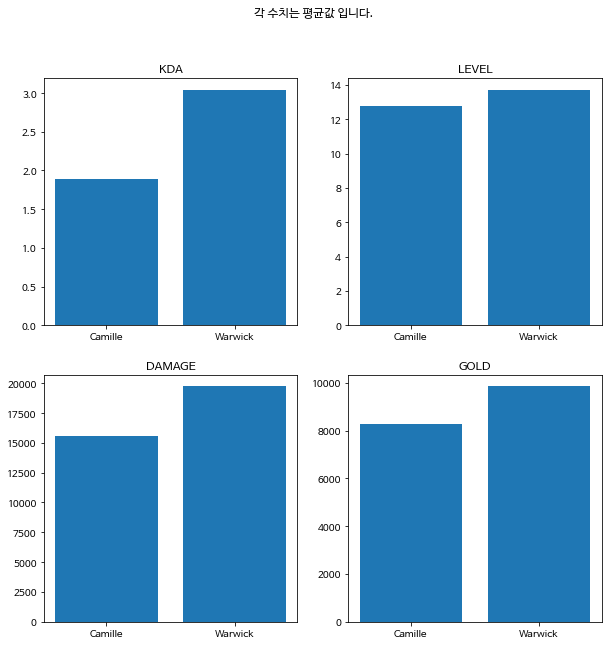

In [ ]:
class Lol :

  def __init__(self, champ, enemy_champ) :
    self.champ = champ
    self.enemy_champ = enemy_champ

  # 상대하기 쉬운, 어려운 챔피언 상위 5개 출력 함수
  def winlose_rate(champ) :
    #globals()[f'{champ}_mask_1'] = whole_data['champ_1'] == f'{champ}'
    #globals()[f'{champ}_mask_2'] = whole_data['champ_2'] == f'{champ}'
    #a = whole_data[globals()[f'{champ}_mask_1']]
    win_mask = globals()[f'df_{champ}']['winlose_1'] == 1 # 승리 게임 마스크
    win_match = globals()[f'df_{champ}'][win_mask]
    win_count = win_match.groupby('champ_2')['winlose_2'].count().tolist() # 상대 챔피언 별 승리한 게임수 리스트 생성
    win_champ = win_match.groupby('champ_2')['winlose_2'].count().keys() # 승리한 게임 상대 챔피언 이름 리스트
    lose_mask = globals()[f'df_{champ}']['winlose_1'] == 0 # 패배 게임 마스크
    lose_match = globals()[f'df_{champ}'][lose_mask]
    lose_count = lose_match.groupby('champ_2')['winlose_2'].count().tolist() # 상대 챔피언 별 패배한 게임 리스트 생성
    lose_champ = lose_match.groupby('champ_2')['winlose_2'].count().keys() # 패배한 게임 상대 챔피언 이름 리스트

    win_df = pd.DataFrame(zip(win_champ, win_count)) # 승리 데이터 프레임
    lose_df = pd.DataFrame(zip(lose_champ, lose_count)) # 패배 데이터 프레임
    # 컬럼 이름 변경
    win_df = win_df.rename(columns = {0 : 'champ', 1 : 'win_count'})
    lose_df = lose_df.rename(columns = {0 : 'champ', 1 : 'lose_count'})
    wl_df = pd.merge(win_df, lose_df, on = 'champ', how='outer') # 병합
    wl_df = wl_df.dropna(axis=0)

    wl_win_count = wl_df['win_count'].tolist()
    wl_lose_count = wl_df['lose_count'].tolist()

    win_array = np.array(wl_win_count) # KDA 평균 연산을 위한 배열 생성
    lose_array = np.array(wl_lose_count)

    win_rate_array = win_array / (win_array+lose_array)
    win_rate_list = win_rate_array.tolist()
    win_rate_list = np.round(win_rate_list, 2) # 소수점 2째자리 까지 표시
  
    lose_rate_array = lose_array / (win_array + lose_array)
    lose_rate_list = lose_rate_array.tolist()
    lose_rate_list = np.round(lose_rate_list, 2)
    champ_list = wl_df['champ'].tolist()

    win_rate_dict = {x : y for x, y in zip(champ_list, win_rate_list)} # KDA 평균 딕셔너리 생성
    lose_rate_dict = {x : y for x, y in zip(champ_list, lose_rate_list)}
    win_rate_dict = sorted(win_rate_dict.items(), key = lambda win_rate_dict : win_rate_dict[1], reverse=True) # 내림차순 정렬
    lose_rate_dict = sorted(lose_rate_dict.items(), key = lambda lose_rate_dict : lose_rate_dict[1], reverse=True)

    win_rate_df = pd.DataFrame(win_rate_dict)
    lose_rate_df = pd.DataFrame(lose_rate_dict)

    # 상위 5개만 표시
    win_rate = win_rate_df[1].mul(100)[:5]
    lose_rate = lose_rate_df[1].mul(100)[:5]
    pw_champ = win_rate_df[0].tolist()[:5]
    pl_champ = lose_rate_df[0].tolist()[:5]

    print(f'{champ}이(가) 상대하기 어려운 챔피언 1~5위\n')              
    for i,champ_1,rate in zip(range(1,6),pl_champ,lose_rate) :
      print(f'{i}. {champ_1} : 패배 확률 {int(rate)}%')
    print('\n')

    print(f'{champ}이(가) 상대하기 쉬운 챔피언 1~5위\n')
    for i,champ_2,rate in zip(range(1,6),pw_champ,win_rate) :
      print(f'{i}. {champ_2} : 승리 확률 {int(rate)}%')

  # 본인의 챔피언과 상대의 챔피언까지 입력했을때 상세한 데이터 값 출력을 위한 함수
  def detail_data(champ, enemy_champ) :
    k = []
    g = []
    d = []
    l = []
    enemy_mask = globals()[f'df_{champ}']['champ_2'] == f'{enemy_champ}'
    match_df = globals()[f'df_{champ}'][enemy_mask]
    # KDA 평균
    mine_kdam = round(match_df['kda_1'].mean(),2)
    enemy_kdam = round(match_df['kda_2'].mean(),2)
    # GOLD 획득량 평균
    mine_gm = round(match_df['golds_1'].mean(),2)
    enemy_gm = round(match_df['golds_2'].mean(),2)
    # DAMAGE 평균
    mine_dm = round(match_df['damage_1'].mean(),2)
    enemy_dm = round(match_df['damage_2'].mean(),2)
    # LEVEL 평균
    mine_lm = round(match_df['level_1'].mean(),2)
    enemy_lm = round(match_df['level_2'].mean(),2)
    k.append(mine_kdam) ,k.append(enemy_kdam)
    g.append(mine_gm) , g.append(enemy_gm)
    d.append(mine_dm) , d.append(enemy_dm)
    l.append(mine_lm) , l.append(enemy_lm)
    all = [k, g, d, l]
    fig, axes = plt.subplots(2, 2)
    axes_ravel = axes.ravel()
    champ_label = [f'{champ}', f'{enemy_champ}']
    # 4개의 barplot으로 표현
    axes[0,0].bar(champ_label, k)
    axes[0,0].set_title('KDA')
    axes[0,1].bar(champ_label, l)
    axes[0,1].set_title('LEVEL')
    axes[1,0].bar(champ_label, d)
    axes[1,0].set_title('DAMAGE')
    axes[1,1].bar(champ_label, g)
    axes[1,1].set_title('GOLD')
    plt.suptitle('각 수치는 평균값 입니다.')
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    plt.show()
    # col = ['kda_1', 'kda_2', 'level_1', 'level_2', 'damage_1', 'damage_2', 'golds_1', 'golds_2']
    # va = globals()[f'df_{champ}'][col].values
    # scaler = MinMaxScaler()
    # scaled_va = scaler.fit_transform(va)
    
    #plt_label = [f'{champ}', f'{enemy_champ}']
    #plt.barh(plt_label, k, align='center', alpha=0.7, color='red')
    #plt.xticks(plt_label)
    #plt.ylabel("KDA")
    #plt.title("각 수치는 평균값입니다.")
    #plt.show()

def input_champ() :
  print('카운터 챔피언만 보시려면 챔피언 이름과 공백 이후 0 을 입력해주세요')
  print('상대 챔피언과의 상세 통계를 보시려면 본인 챔피언 이름과 공백 이후 상대 챔피언 이름을 입력해주세요')
  champ, enemy_champ = input('챔피언 :').split()
  # 조건문을 통해 카운터 챔피언만 볼것인지, 상세한 분석도 볼것인지 선택
  if enemy_champ == '0' :
    Lol.winlose_rate(f'{champ}')
  if enemy_champ != '0' :
    Lol.detail_data(f'{champ}', f'{enemy_champ}')

def run() :
  input_champ()

if __name__ == "__main__":
    run()

# 특성 기여도 분석

## 랜덤 포레스트 분석

In [ ]:
whole_data = pd.read_csv('/content/drive/MyDrive/4주 프로젝트/티어별 최종 데이터/whole_data_df.csv.csv')

In [ ]:
whole_data.drop('Unnamed: 0', axis=1,  inplace = True)

In [ ]:
whole_data

,champ_1,champ_2,winlose_1,winlose_2,kda_1,kda_2,level_1,level_2,damage_1,damage_2,golds_1,golds_2
0,Camille,Gnar,False,True,2.50,5.00,11,13,8920,13703,7279,9610
1,Fiora,Rengar,False,True,1.33,3.00,10,10,6981,10851,4914,6051
2,KSante,Renekton,True,False,1.86,3.50,14,15,10129,18039,9350,11863
3,Irelia,Warwick,False,True,1.80,2.00,15,15,11642,15278,11045,10043
4,Jayce,Yorick,True,False,1.00,0.00,11,11,4868,4199,6879,5045
...,...,...,...,...,...,...,...,...,...,...,...,...
145025,Swain,Renata,False,True,2.00,1.13,10,11,10872,7513,7579,7368
145026,Rakan,Lulu,False,True,1.00,1.14,11,12,3134,7954,6040,9205
145027,Yuumi,Karma,True,False,1.20,1.00,10,10,6429,5806,6287,4628
145028,Yuumi,Sylas,False,True,1.00,1.28,11,13,8955,18164,5663,9191


In [ ]:
whole_data = whole_data.replace(True, 1)
whole_data = whole_data.replace(False, 0)

In [ ]:
# 데이터 준비
feature_df = whole_data # 기여도 분석에 쓰일 데이터 복사

# champ_1, champ_2 병합 준비
champ_2 = feature_df['champ_2']
winlose_2 = feature_df['winlose_2']
level_2 = feature_df['level_2']
kda_2 = feature_df['kda_2']
damage_2 = feature_df['damage_2']
golds_2 = feature_df['golds_2']
df2 = pd.concat([champ_2, winlose_2, kda_2, level_2, damage_2, golds_2], axis = 1) # 병합
df2 = df2.rename(columns = {'champ_2' : 'champ', 'winlose_2' : 'winlose', 'kda_2' : 'kda', 'level_2' : 'level', 'damage_2' : 'damage', 'golds_2' : 'golds'}) # 컬럼명 변경

feature_df.drop(['champ_2', 'winlose_2', 'level_2', 'kda_2', 'damage_2', 'golds_2'], axis=1, inplace = True) # 원본 데이터에서 2번 삭제
feature_df = feature_df.rename(columns = {'champ_1' : 'champ', 'winlose_1' : 'winlose', 'kda_1' : 'kda', 'level_1' : 'level', 'damage_1' : 'damage', 'golds_1' : 'golds'}) # 컬럼명 변경

feature_df = pd.concat([feature_df, df2], axis = 0) # 다시 하나로 병합

In [ ]:
feature_df.drop('champ', axis=1, inplace=True) # 기여도 분석을 위해 챔프 삭제

In [ ]:
feature_df

,winlose,kda,level,damage,golds
0,0,2.50,11,8920,7279
1,0,1.33,10,6981,4914
2,1,1.86,14,10129,9350
3,0,1.80,15,11642,11045
4,1,1.00,11,4868,6879
...,...,...,...,...,...
145025,1,1.13,11,7513,7368
145026,1,1.14,12,7954,9205
145027,0,1.00,10,5806,4628
145028,1,1.28,13,18164,9191


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(
    feature_df.drop("winlose", axis=1),
    feature_df['winlose'],
    random_state=42
)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 500],
           'max_depth' : [30, 32, 34, 36],
           'min_samples_leaf' : [4, 8, 12],
           'min_samples_split' : [2, 4, 8]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


최적 하이퍼 파라미터:  {'max_depth': 34, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
최고 예측 정확도: 0.8044


In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [100, 500, 700],
           'max_depth' : [40, 42, 44, 46],
           'min_samples_leaf' : [4, 8, 12],
           'min_samples_split' : [2, 4, 8]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = { 'n_estimators' : [100, 500, 700],
           'max_depth' : [40, 42, 44, 46],
           'min_samples_leaf' : [4, 8, 12],
           'min_samples_split' : [2, 4, 8]
            }

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 500]}, scoring='accuracy')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators' : [10, 700],
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 700]}, scoring='accuracy')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = { 'n_estimators' : [100, 500, 700],
           #'max_depth' : [40, 42, 44, 46],
           #'min_samples_leaf' : [4, 8, 12],
           #'min_samples_split' : [2, 4, 8]
            }

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [100, 500, 700]}, scoring='accuracy')

In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(rf_grid_search.cv_results_)

# max_depth,min_samples_split 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,100,0.837293
1,500,0.837859
2,700,0.838374


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = { 'n_estimators' : [100, 500, 700],
           'max_depth' : [40, 42, 44, 46],
           #'min_samples_leaf' : [4, 8, 12],
           #'min_samples_split' : [2, 4, 8]
            }

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [40, 42, 44, 46],
                         'n_estimators': [100, 500, 700]},
             scoring='accuracy')

In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(rf_grid_search.cv_results_)

# max_depth,min_samples_split 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,100,0.837500
1,500,0.838484
2,700,0.838443
3,100,0.837560
4,500,0.838521
5,700,0.838700
6,100,0.837528
7,500,0.837891
8,700,0.838337
9,100,0.837261


In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(rf_grid_search.cv_results_)

# max_depth,min_samples_split 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,100,0.816355
1,500,0.817445
2,700,0.817849
3,100,0.788903
4,500,0.789827
5,700,0.790039
6,100,0.767620
7,500,0.768448
8,700,0.768498
9,100,0.816599


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = { 'n_estimators' : [100, 500, 700],
           'max_depth' : [40, 42, 44, 46],
           'min_samples_leaf' : [4, 8, 12],
           #'min_samples_split' : [2, 4, 8]
            }

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [40, 42, 44, 46],
                         'min_samples_leaf': [4, 8, 12],
                         'n_estimators': [100, 500, 700]},
             scoring='accuracy')

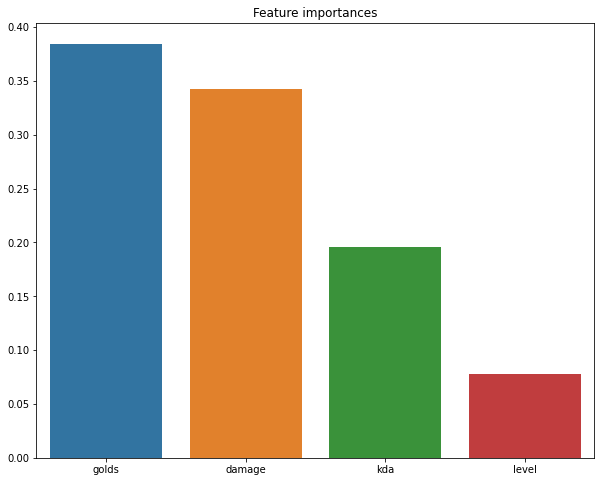

In [ ]:
def plot_feature_importance(model, columns, limit=None):
 
  ftr_importances_values = model.feature_importances_
  # 시리즈 형태로 변환 변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(10,8))
  plt.title('Feature importances')
  sns.barplot(x=ftr_top.index , y = ftr_top)
  plt.show()
  
plot_feature_importance(rf_grid_search.best_estimator_, x_train.columns)

In [ ]:
best = rf_grid_search.best_estimator_

In [ ]:
best.score(x_test, y_test)

0.8479762807694959

## xgboost 분석

In [ ]:
!pip install xgboost==1.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
# train, test 세트 구분
x_train , x_test , y_train , y_test = train_test_split(
    feature_df.drop("winlose", axis=1),
    feature_df['winlose'],
    random_state=42
)

# train세트 안에서 검증세트 구분
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train,
    y_train,
    random_state=42
)

In [ ]:
dtr = xgb.DMatrix(data=x_train, label=y_train)
dval = xgb.DMatrix(data=x_valid, label=y_valid)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [ ]:
params = {
    'max_depth': 10,
    'eta': 0.05,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}

num_rounds = 400

In [ ]:
# 학습 데이터 세트는 'train', 평가(검증) 데이터 세트는 'eval'로 명칭
eval_list = [
    (dtr, 'train'),
    (dval, 'eval')
]

xgb_model = xgb.train(
    params=params,
    dtrain=dtr,
    num_boost_round=num_rounds,
    early_stopping_rounds=50,
    evals=eval_list
)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# 분류기 객체 생성
xgb_wrapper = XGBClassifier(
    n_estimators=500,
    learning_rate=0.3,
    max_depth=10,
    eval_metric='logloss'
)

In [ ]:
xgb_wrapper.fit(x_train, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 훈련 시점에 훈련에 관련된 하이퍼 파라미터 전달.
evals = [
    (x_train, y_train),
    (x_valid, y_valid)
]

xgb_wrapper.fit(
    x_train,
    y_train,
    early_stopping_rounds=50,
    eval_metric="logloss",
    eval_set=evals,
    verbose=True
)

[0]	validation_0-logloss:0.65931	validation_1-logloss:0.66273
[1]	validation_0-logloss:0.63516	validation_1-logloss:0.64157
[2]	validation_0-logloss:0.61705	validation_1-logloss:0.62591
[3]	validation_0-logloss:0.60325	validation_1-logloss:0.61480
[4]	validation_0-logloss:0.59233	validation_1-logloss:0.60617
[5]	validation_0-logloss:0.58378	validation_1-logloss:0.59936
[6]	validation_0-logloss:0.57667	validation_1-logloss:0.59384
[7]	validation_0-logloss:0.57064	validation_1-logloss:0.58919
[8]	validation_0-logloss:0.56593	validation_1-logloss:0.58575
[9]	validation_0-logloss:0.56110	validation_1-logloss:0.58253
[10]	validation_0-logloss:0.55688	validation_1-logloss:0.57965
[11]	validation_0-logloss:0.55246	validation_1-logloss:0.57657
[12]	validation_0-logloss:0.54947	validation_1-logloss:0.57461
[13]	validation_0-logloss:0.54654	validation_1-logloss:0.57267
[14]	validation_0-logloss:0.54367	validation_1-logloss:0.57105
[15]	validation_0-logloss:0.54090	validation_1-logloss:0.56908
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5000, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred = xgb_wrapper.predict(x_test)
pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

get_clf_eval(
    y_test,
    pred,
    pred_proba
)

오차 행렬
[[29612  6569]
 [ 6226 30108]]
정확도: 0.8236, 정밀도: 0.8209, 재현율: 0.8286,    F1: 0.8248, AUC:0.8948


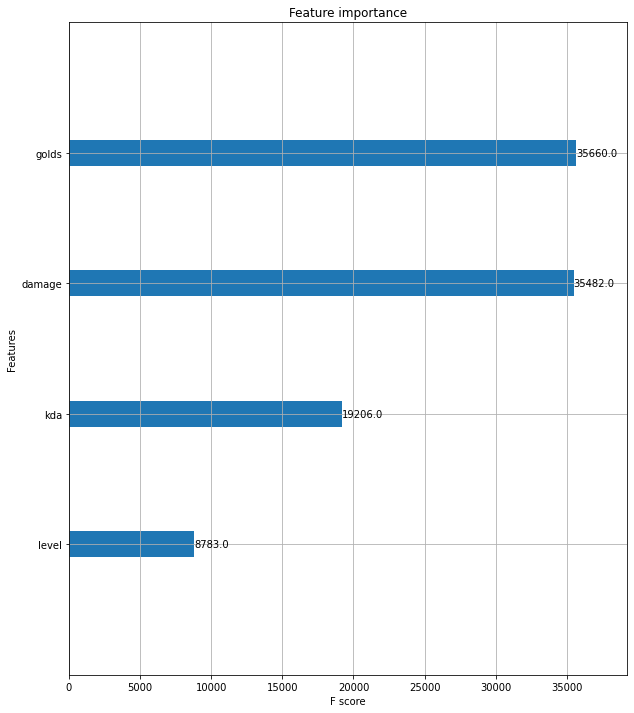

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [ ]:
!pip install lightgbm==3.3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
import lightgbm

In [ ]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(
    n_estimators= 5000,
    learning_rate=0.3,
    max_depth = 10
)

lgbm_wrapper.fit(
    x_train,
    y_train,
    early_stopping_rounds=50,
    eval_metric='logloss',
    eval_set=evals,
    verbose=True
)

/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's binary_logloss: 0.661792	valid_1's binary_logloss: 0.662524
[2]	training's binary_logloss: 0.643051	valid_1's binary_logloss: 0.644365
[3]	training's binary_logloss: 0.631603	valid_1's binary_logloss: 0.633395
[4]	training's binary_logloss: 0.624248	valid_1's binary_logloss: 0.626465
[5]	training's binary_logloss: 0.618702	valid_1's binary_logloss: 0.621114
[6]	training's binary_logloss: 0.614885	valid_1's binary_logloss: 0.617615
[7]	training's binary_logloss: 0.610708	valid_1's binary_logloss: 0.613428
[8]	training's binary_logloss: 0.608009	valid_1's binary_logloss: 0.611222
[9]	training's binary_logloss: 0.605001	valid_1's binary_logloss: 0.60865
[10]	training's binary_logloss: 0.602976	valid_1's binary_logloss: 0.606742
[11]	training's binary_logloss: 0.600202	valid_1's binary_logloss: 0.604564
[12]	training's binary_logloss: 0.598817	valid_1's binary_logloss: 0.603378
[13]	training's binary_logloss: 0.597521	valid_1's binary_logloss: 0.602275
[14]	training's binary

LGBMClassifier(learning_rate=0.3, max_depth=10, n_estimators=5000)